# Parity Plot Combined (Penalty vs. No Penalty)

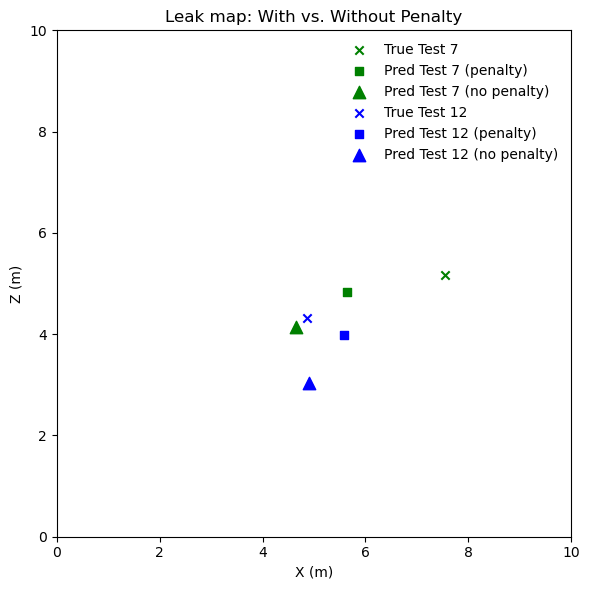

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 1) Load the saved parity data
with np.load('parity_with_penalty.npz') as data_p:
    med_t7_p   = data_p['med_true7']
    mean_p7_p  = data_p['mean_pred7']
    med_t12_p  = data_p['med_true12']
    mean_p12_p = data_p['mean_pred12']


with np.load('parity_with_no_penalty.npz') as data_np:
    med_t7_np   = data_np['med_true7']
    mean_p7_np  = data_np['mean_pred7']
    med_t12_np  = data_np['med_true12']
    mean_p12_np = data_np['mean_pred12']


# 2) Determine plot limits from all points
all_pts = np.vstack([
    med_t7_p, mean_p7_p, med_t12_p, mean_p12_p,
    med_t7_np, mean_p7_np, med_t12_np, mean_p12_np
])
low, high = all_pts.min(), all_pts.max()


# 3) Create the combined parity plot
plt.figure(figsize=(6,6))


# Parity line
# plt.plot([low, high], [low, high], 'k--', label='Parity line')


# # With penalty (blue markers)
plt.scatter(-med_t7_p[0],  -med_t7_p[1],  marker='x', color = 'green', label='True Test 7')
plt.scatter(-mean_p7_p[0], -mean_p7_p[1], marker='s', color = 'green',label='Pred Test 7 (penalty)')
# No penalty (red markers)
# plt.scatter(med_t7_np[0],  med_t7_np[1],  marker='o', s=80, label='True Test 7 (no penalty)')
plt.scatter(-mean_p7_np[0], -mean_p7_np[1], marker='^', s=80, color = 'green', label='Pred Test 7 (no penalty)')

plt.scatter(-med_t12_p[0], -med_t12_p[1], marker='x', color = 'blue', label='True Test 12')
plt.scatter(-mean_p12_p[0],-mean_p12_p[1],marker='s', color = 'blue', label='Pred Test 12 (penalty)')
# plt.scatter(med_t12_np[0], med_t12_np[1], marker='o', s=80, label='True Test 12 (no penalty)')
plt.scatter(-mean_p12_np[0],-mean_p12_np[1],marker='^', s=80, color = 'blue', label='Pred Test 12 (no penalty)')


# 4) Finalize styling
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('X (m)')
plt.ylabel('Z (m)')
plt.title('Leak map: With vs. Without Penalty')
leg = plt.legend(frameon=True)
leg.get_frame().set_alpha(0.0)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig('ANN_parity_plot.png',
            dpi = 400,
            transparent = True,
            bbox_inches = 'tight')
# 5) Show (or save)
plt.show()


In [ ]:
# PREDICTED X and Z
# mean_pred7 + mean_pred12 hold two values [mean_x, mean_z]
mean_x7, mean_z7 = mean_p7_p # get the model's average predicted X and Z for test 7
mean_x12, mean_z12 = mean_p12_p # get the model's average predicted X and Z for test 12

np_mean_x7, np_mean_z7 = mean_p7_np
np_mean_x12, np_mean_z12 = mean_p12_np


# print, formatted to 4 decimal places
print(f"Test 7 with penalty -> X: {mean_x7:.4f}, Z: {mean_z7:.4f}")
print(f"Test 12 with penalty -> X: {mean_x12:.4f}, Z: {mean_z12:.4f}")

print(f"Test 7 with no penalty -> X: {np_mean_x7:.4f}, Z: {np_mean_z7:.4f}")
print(f"Test 12 with no penalty -> X: {np_mean_x12:.4f}, Z: {np_mean_z12:.4f}")

# OTHER

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

In [ ]:
# img_with_penalty = mpimg.imread('parity_plot_with_penalty.png')
# img_with_no_penalty = mpimg.imread('parity_plot_with_no_penalty.png')

In [ ]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
# ax1.imshow(img_with_penalty)
# ax1.axis('off')
# ax1.set_title('With Penalty')

# ax2.imshow(img_with_no_penalty)
# ax2.axis('off')
# ax2.set_title('With no penalty')

# plt.suptitle('Combined Parity Plots', y=1.02)
# plt.tight_layout()
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt


# # 1) load your data
# A = np.load("results_with_penalty.npz")
# y7_trueA  = A["y7_trueA"]
# y7_predA  = A["y7_predA"]
# y12_trueA = A["y12_trueA"]
# y12_predA = A["y12_predA"]


# B = np.load("results_with_no_penalty.npz")
# y7_trueB  = B["y7_trueB"]
# y7_predB  = B["y7_predB"]
# y12_trueB = B["y12_trueB"]
# y12_predB = B["y12_predB"]


# # 2) compute medians & means (axis=0 walks over your samples)
# med7A   = np.median(y7_trueA,  axis=0); mean7A   = np.mean(y7_predA,  axis=0)
# med12A  = np.median(y12_trueA, axis=0); mean12A  = np.mean(y12_predA, axis=0)
# med7B   = np.median(y7_trueB,  axis=0); mean7B   = np.mean(y7_predB,  axis=0)
# med12B  = np.median(y12_trueB, axis=0); mean12B  = np.mean(y12_predB, axis=0)


# # 3) plot them on one parity plot
# plt.figure(figsize=(6,6))

# # A = PENALTY, B = PENALTY

# # — penalty points (filled markers) —
# plt.scatter(med7A[0],  med7A[1],  marker='x', color='blue', label='True for Test 7 - With Penalty')
# plt.scatter(mean7A[0],  mean7A[1],  marker='s', color='blue', label='Pred for Test 7 - With Penalty')
# plt.scatter(med12A[0], med12A[1], marker='x', color='black', label='True for Test12 - With Penalty')
# plt.scatter(mean12A[1], mean12A[1], marker='s', color='black', label='Pred for Test 12 - With Penalty')


# # — no-penalty points (hollow markers) —
# # plt.scatter(med7B[0],  mean7B[0],  marker='o', edgecolor='C0', facecolor='none', label='Test7 X (no penalty)')
# # plt.scatter(med7B[1],  mean7B[1],  marker='s', edgecolor='C0', facecolor='none', label='Test7 Z (no penalty)')
# # plt.scatter(med12B[0], mean12B[0], marker='o', edgecolor='C1', facecolor='none', label='Test12 X (no penalty)')
# # plt.scatter(med12B[1], mean12B[1], marker='s', edgecolor='C1', facecolor='none', label='Test12 Z (no penalty)')


# # 1:1 parity line
# # lims = [
# #     min(plt.xlim()[0], plt.ylim()[0]),
# #     max(plt.xlim()[1], plt.ylim()[1])
# # ]
# # plt.plot(lims, lims, '--', color='gray', linewidth=1)


# plt.xlim([-10,0])
# plt.ylim([-10,0])
# plt.xlabel('X')
# plt.ylabel('Z')
# plt.title('Combined Parity Plot: Test 7 & 12 With/Without Penalty')
# plt.legend(loc='best', fontsize='small')
# plt.tight_layout()
# plt.show()


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score 

dataA = np.load("parity_with_penalty.npz") 
y7_trueA = dataA["med_true7_p"] 
y7_predA = dataA["mean_pred7_p"] 
y12_trueA = dataA["med_true12_p"] 
y12_predA = dataA["mean_pred12_p"] 

dataB = np.load("parity_with_no_penalty.npz") 
y7_trueB = dataB["med_true7_np"] 
y7_predB = dataB["mean_pred7_np"] 
y12_trueB = dataB["med_true12_np"] 
y12_predB = dataB["mean_pred12_np"] 

In [ ]:
true7A_X = y7_trueA[:, 0]
pred7A_X = y7_predA[:, 0]
true7A_Z = y7_trueA[:, 1]
pred7A_Z = y7_predA[:, 1]

true12A_X = y12_trueA[:, 0]
pred12A_X = y12_predA[:, 0]
true12A_Z = y12_trueA[:, 1]
pred12A_Z = y12_predA[:, 1]

mean_true7A_X = np.median(true7A_X)
mean_pred7A_X = np.mean(pred7A_X)
mean_true7A_Z = np.median(true7A_Z)
mean_pred7A_Z = np.mean(pred7A_Z)

mean_true12A_X = np.median(true12A_X)
mean_pred12A_X = np.mean(pred12A_X)
mean_true12A_Z = np.median(true12A_Z)
mean_pred12A_Z = np.mean(pred12A_Z)

# Unpack B
true7B_X = y7_true_B[:, 0]
pred7B_X = y7_pred_B[:, 0]
true7B_Z = y7_true_B[:, 1]
pred7B_Z = y7_pred_B[:, 1]

true12B_X = y12_true_B[:, 0]
pred12B_X = y12_pred_B[:, 0]
true12B_Z = y12_true_B[:, 1]
pred12B_Z = y12_pred_B[:, 1]

mean_true7B_X = np.median(true7B_X)
mean_pred7B_X = np.mean(pred7B_X)
mean_true7B_Z = np.median(true7B_Z)
mean_pred7B_Z = np.mean(pred7B_Z)

mean_true12B_X = np.median(true12B_X)
mean_pred12B_X = np.mean(pred12B_X)
mean_true12B_Z = np.median(true12B_Z)
mean_pred12B_Z = np.mean(pred12B_Z)


all_vals = np.hstack([
    true7A_X, pred7A_X, true7A_Z, pred7A_Z,
    true12A_X, pred12A_X, true12A_Z, pred12A_Z,
    true7B_X, pred7B_X, true7B_Z, pred7B_Z,
    true12B_X, pred12B_X, true12B_Z, pred12B_Z
])

print(all_vals)
vmin, vmax = all_vals.min(), all_vals.max()
pad = 0.1 * (vmax - vmin)


fig, ax = plt.subplots(figsize=(6, 6))


# ax.scatter(mean_trueA_X, mean_trueA_Z, s=100, c='C0', marker='o', label='Result with Penalty --> True')


ax.scatter(mean_pred7A_X, mean_pred7A_Z, s=100, color = 'blue', marker='s', label='Result with Penalty (test 7) --> Predicted')

ax.scatter(mean_true7A_X, mean_true7A_Z, s=100, color = 'blue', marker='x', label='(test 7) --> True')

ax.scatter(mean_pred12A_X, mean_pred12A_Z, s=100, color = 'black', marker='s', label='Result with Penalty (test 12) --> Predicted')

ax.scatter(mean_true12A_X, mean_true12A_Z, s=100, color = 'black', marker='x', label='(test 12) --> True')


ax.scatter(mean_pred7B_X, mean_pred7B_Z, s=100, color = 'blue', marker='o', label='Result with No Penalty (test 7) --> Predicted')

#ax.scatter(mean_true7B_X, mean_true7B_Z, s=100, color = 'pink', marker='s', label='Result with No Penalty (test 7) --> True')

ax.scatter(mean_pred12B_X, mean_pred12B_Z, s=100, color = 'black', marker='o', label='Result with No Penalty (test 12) --> Predicted')

#ax.scatter(mean_true12B_X, mean_true12B_Z, s=100, color = 'cyan', marker='s', label='Result with No Penalty (test 12) --> True')


#ax.scatter(mean_predB_X, mean_predB_Z, s=100, c='C1', marker='s', label='Result with no Penalty --> Predicted')

#ax.scatter(mean_trueB_X, mean_trueB_Z, s=100, c='C1', marker='o', label='True')


#ax.plot(
    #[vmin - pad, vmax + pad],
    #[vmin - pad, vmax + pad],
    #'k--', linewidth=1, alpha=0.5
#)


#ax.set_xlim(vmin - pad, vmax + pad)
#ax.set_ylim(vmin - pad, vmax + pad)
# plt.xlim([-7,-3])
# plt.ylim([-7,-3])

plt.xlim([-10, 0])
plt.ylim([-10, 0])


# ax.set_xlabel("True Value")
# ax.set_ylabel("Predicted Value")
# ax.set_title("Combined Parity Plot")

ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.set_title("Combined Parity Plot - Comparing Leak Points")
ax.legend()
#x.grid(alpha=0.25)

plt.tight_layout()
plt.show()



In [ ]:
print("All Predicted Value")
print("This is the result with penalty ")
print(mean_predA_X, "x")
print(mean_predA_Z, "z") 
print("")
print("This is result with no penalty") 
print(mean_predB_X, "x") 
print(mean_predB_Z, "z")  

print('') 

print("All True Values") 
print(mean_trueA_X, "x") 
print(mean_trueA_Z, "z")

print('')
# print(mean_predA_X)
error_x_A=abs((mean_predA_X  - mean_trueA_X)/mean_trueA_X) 
error_x_B=abs((mean_predB_X  - mean_trueA_X)/mean_trueA_X) 

print('Error of X (with penalty)', error_x_A*100, '||', 'Error of X (with no penalty)', error_x_B*100)

In [ ]:
# trueA_X = y_true_A[:, 0]
# predA_X = y_pred_A[:, 0]
# trueA_Z = y_true_A[:, 1]
# predA_Z = y_pred_A[:, 1]

# mean_trueA_X = np.median(trueA_X)
# mean_predA_X = np.mean(predA_X)
# mean_trueA_Z = np.median(trueA_Z)
# mean_predA_Z = np.mean(predA_Z)

# # Unpack B
# trueB_X = y_true_B[:, 0]
# predB_X = y_pred_B[:, 0]
# trueB_Z = y_true_B[:, 1]
# predB_Z = y_pred_B[:, 1]

# mean_trueB_X = np.median(trueB_X)
# mean_predB_X = np.mean(predB_X)
# mean_trueB_Z = np.median(trueB_Z)
# mean_predB_Z = np.mean(predB_Z)


# all_vals = np.hstack([
#     trueA_X, predA_X, trueA_Z, predA_Z,
#     trueB_X, predB_X, trueB_Z, predB_Z
# ])

# vmin, vmax = all_vals.min(), all_vals.max()
# pad = 0.1 * (vmax - vmin)


# fig, ax = plt.subplots(figsize=(6, 6))


# ax.scatter(
#     mean_predA_X,
#     mean_predA_Z,
#     s=100,
#     c='C0',
#     marker='o',
#     label='Result for Everything'
# )


# ax.scatter(
#     mean_predB_X,
#     mean_predB_Z,
#     s=100,
#     c='C0',
#     marker='s',
#     label='Result starting at 200'
# )


# ax.scatter(
#     mean_trueB_X,
#      mean_trueB_Z,
#     s=100,
#     c='C1',
#     marker='o',
#     label='True leak location'
# )


# # ax.scatter(
# #     mean_trueB_Z,
# #     mean_predB_Z,
# #     s=100,
# #     c='C1',
# #     marker='s',
# #     label='Result starting at 200 --> Avg Z'
# # )


# #ax.plot(
#     #[vmin - pad, vmax + pad],
#     #[vmin - pad, vmax + pad],
#     #'k--', linewidth=1, alpha=0.5
# #)


# #ax.set_xlim(vmin - pad, vmax + pad)
# #ax.set_ylim(vmin - pad, vmax + pad)
# plt.xlim([-6,-3])
# plt.ylim([-6,-3])


# ax.set_xlabel("X (m)")
# ax.set_ylabel("Z (m)")
# ax.set_title("Leak location map")
# ax.legend()
# #x.grid(alpha=0.25)

# plt.tight_layout()
# plt.show()

